In [1]:
import numpy as np
import pandas as pd
import copy
import collections
from scipy import linalg
import math
from collections import defaultdict

In [2]:
#data
# index[0]:user_id, index[1]:movie_id, index[2]:ratings
df = pd.read_csv('./ml-100k/u.data',sep='\t',header=None)

In [3]:
df.head(3)

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [4]:
#movie list
df_info = pd.read_csv('./ml-100k/u.item',sep='|',header=None, encoding="ISO-8859-1")

In [5]:
df_info.head(2)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
movielist = [df_info[1].tolist()[indx]+';'+str(indx+1) for indx in range(len(df_info[1].tolist()))]

In [7]:
nmovies = len(movielist)
nusers = len(df[0].drop_duplicates().tolist())
print("Movie counts: {}, User counts: {}".format(nmovies, nusers))

Movie counts: 1682, User counts: 943


In [8]:
min_ratings = 50
movies_rated  = list(df[1])
counts = collections.Counter(movies_rated)

In [9]:
dfout = pd.DataFrame(columns=['user']+movielist)

In [10]:
dfout.head(1)

,user,Toy Story (1995);1,GoldenEye (1995);2,Four Rooms (1995);3,Get Shorty (1995);4,Copycat (1995);5,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995);6,Twelve Monkeys (1995);7,Babe (1995);8,Dead Man Walking (1995);9,...,Mirage (1995);1673,Mamma Roma (1962);1674,"Sunchaser, The (1996);1675","War at Home, The (1996);1676",Sweet Nothing (1995);1677,Mat' i syn (1997);1678,B. Monkey (1998);1679,Sliding Doors (1998);1680,You So Crazy (1994);1681,Scream of Stone (Schrei aus Stein) (1991);1682


In [11]:
toremovelist = []
for i in range(1,nusers):
    tmpmovielist = [0 for j in range(nmovies)]
    dftmp =df[df[0]==i]
    for k in dftmp.index:
        if counts[dftmp.ix[k][1]]>= min_ratings:           
           tmpmovielist[dftmp.ix[k][1]-1] = dftmp.ix[k][2]
           
        else:
           toremovelist.append(dftmp.ix[k][1])
            
    dfout.loc[i] = [i]+tmpmovielist

/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [12]:
toremovelist=list(set(toremovelist))
dfout.drop(dfout.columns[toremovelist], axis=1, inplace=True)
dfout.to_csv('utilitymatrix.csv',index=None)

In [13]:
dfout.head(5)

,user,Toy Story (1995);1,GoldenEye (1995);2,Four Rooms (1995);3,Get Shorty (1995);4,Copycat (1995);5,Twelve Monkeys (1995);7,Babe (1995);8,Dead Man Walking (1995);9,Richard III (1995);10,...,Cool Runnings (1993);1035,Hamlet (1996);1039,Forget Paris (1995);1041,Multiplicity (1996);1047,She's the One (1996);1048,Koyaanisqatsi (1983);1065,Shallow Grave (1994);1073,Reality Bites (1994);1074,Six Degrees of Separation (1993);1101,Some Kind of Wonderful (1987);1119
1,1,5,3,4,3,3,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 영화 장르 데이터

In [14]:
#matrix movies's content
movieslist = [int(m.split(';')[-1]) for m in dfout.columns[1:]]
moviescats = ['unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary',
              'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
              'Romance','Sci-Fi','Thriller','War','Western']
dfout_movies =  pd.DataFrame(columns=['movie_id']+moviescats)
startcatsindx = 5
cnt= 0
for m in movieslist:
    dfout_movies.loc[cnt] = [m]+df_info.iloc[m-1][startcatsindx:].tolist()
    cnt +=1 
print(dfout_movies.head())

dfout_movies.to_csv('movies_content.csv',index=None)

  movie_id unknown Action Adventure Animation Children's Comedy Crime  \
0        1       0      0         0         1          1      1     0   
1        2       0      1         1         0          0      0     0   
2        3       0      0         0         0          0      0     0   
3        4       0      1         0         0          0      1     0   
4        5       0      0         0         0          0      0     1   

  Documentary Drama Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi  \
0           0     0       0         0      0       0       0       0      0   
1           0     0       0         0      0       0       0       0      0   
2           0     0       0         0      0       0       0       0      0   
3           0     1       0         0      0       0       0       0      0   
4           0     1       0         0      0       0       0       0      0   

  Thriller War Western  
0        0   0       0  
1        1   0       0  
2        1 

### 결측치 대체(Imputation)

In [15]:
def imputation(inp,Ri):
    Ri = Ri.astype(float)
    def userav():
        for i in xrange(len(Ri)):
            Ri[i][Ri[i]==0] = sum(Ri[i])/float(len(Ri[i][Ri[i]>0]))
        return Ri
    def itemav():
        for i in xrange(len(Ri[0])):
            Ri[:,i][Ri[:,i]==0] = sum(Ri[:,i])/float(len(Ri[:,i][Ri[:,i]>0]))
        return Ri            
    switch = {'useraverage':userav(),'itemaverage':itemav()}
    return switch[inp]

### 유사도 평가

In [16]:
from scipy.stats import pearsonr
from scipy.spatial.distance import cosine 
def sim(x,y,metric='cos'):
    if metric == 'cos':
       return 1.-cosine(x,y)
    else:#correlation
       return pearsonr(x,y)[0]

## 협업 필터링 방법 (Collaborative Filtering Methods)

### 메모리 기반 협업 필터링

* 메모리 기반 형업 필터링은 **사용자 기반 협업 필터링(User-Based Collaborative Filtering)**과 **아이템 기반 협업 필터링(item-Based Collaborative Filtering)**으로 구분할 수 있다.

#### 1. 사용자 기반 협업 필터링

* **u_vec**은 사용자 평점 벡터로 함수 **FindKNeighbours**에서 이 벡터와 가장 비슷한 사용자 $K$를 찾는다. 
* **CalcRating** 함수는 앞의 식을 이용해서 예측 평점을 계산한다. 단, 분포 교정은 하지 않는다.
* 유틸리티 행렬이 데이터가 별로 없어 이웃이 없는 경우 사용자의 평균 평점으로 예측이 이루어지도록 구현되었다.
* 예측 평점이 5를 넘거나 1보다 낮은 경우 각각 5와 1로 조정된다.

In [17]:
def CF_userbased(u_vec,K,data,indxs=False):
    def FindKNeighbours(r,data,K):
        neighs = []
        cnt=0
        for u in range(len(data)):
            if data[u,r]>0 and cnt<K:
               neighs.append(data[u])   
               cnt +=1 
            elif cnt==K:
               break
        return np.array(neighs)
        
    def CalcRating(u_vec,r,neighs):
        rating = 0.
        den = 0.
        for j in range(len(neighs)):
            rating += neighs[j][-1]*float(neighs[j][r]-neighs[j][neighs[j]>0][:-1].mean())
            den += abs(neighs[j][-1])
        if den>0:
            rating = np.round(u_vec[u_vec>0].mean()+(rating/den),0)
        else:
            rating = np.round(u_vec[u_vec>0].mean(),0)
        if rating>5:
            return 5.
        elif rating<1:
            return 1.
        return rating 
    #add similarity col
    data = data.astype(float)
    nrows = len(data)
    ncols = len(data[0])
    data_sim = np.zeros((nrows,ncols+1))
    data_sim[:,:-1] = data
    #calc similarities:
    for u in range(nrows):
        if np.array_equal(data_sim[u,:-1],u_vec)==False: #list(data_sim[u,:-1]) != list(u_vec):
           data_sim[u,ncols] = sim(data_sim[u,:-1],u_vec,'pearson')
        else:
           data_sim[u,ncols] = 0.
    #order by similarity:
    data_sim =data_sim[data_sim[:,ncols].argsort()][::-1]
    #find the K users for each item not rated:
    u_rec = np.zeros(len(u_vec))
    for r in range(ncols):
        if u_vec[r]==0:
           neighs = FindKNeighbours(r,data_sim,K)
           #calc the predicted rating
           u_rec[r] = CalcRating(u_vec,r,neighs)
    if indxs:
            #take out the rated movies
            seenindxs = [indx for indx in range(len(u_vec)) if u_vec[indx]>0]
            u_rec[seenindxs] = -1
            recsvec = np.argsort(u_rec)[::-1][np.argsort(u_rec)>0]
        
            return recsvec    
    return u_rec

#### 2. 아이템 기반 협업 필터링

* 클래스 **CF_itembased**의 생성자는 아이템 유사도 행렬 **simmatrix**를 계산한다.
* 아이템에 대해 사용자 평점이 없는 경우 함수 **CalcRatings**를 통해 예측을 하게 되며, 이 때 함수 내부적으로 **simmatrix**를 사용한다.
* 함수 **GetKSimItemsperUser**는 사용자가 평가하지 않은 아이템과 유사도가 가장 높은 아이템 중 사용자가 과거에 평가했던 $K$개의 아이템을 찾는다.
* **u_vec**는 사용자 평점 벡터로, 유틸리티 행렬의 행 벡터이다. **CalcRatings**은 가중 평균 평점을 계산한다. 이웃을 찾을 수 없는 경우 평점은 아이템의 평균 평점으로 설정한다.

In [18]:
class CF_itembased(object):
    def __init__(self,data):
        #calc item similarities matrix
        nitems = len(data[0])
        self.data = data
        self.simmatrix = np.zeros((nitems,nitems))
        for i in range(nitems):
            for j in range(nitems):
                if j>=i:#triangular matrix
                   self.simmatrix[i,j] = sim(data[:,i],data[:,j])
                else:
                   self.simmatrix[i,j] = self.simmatrix[j,i]

    def GetKSimItemsperUser(self,r,K,u_vec):
        items = np.argsort(self.simmatrix[r])[::-1]
        items = items[items!=r]
        cnt=0
        neighitems = []
        for i in items:
            if u_vec[i]>0 and cnt<K:
               neighitems.append(i)
               cnt+=1
            elif cnt==K:
               break
        return neighitems
        
    def CalcRating(self,r,u_vec,neighitems):
        rating = 0.
        den = 0.
        for i in neighitems:
            rating +=  self.simmatrix[r,i]*u_vec[i]
            den += abs(self.simmatrix[r,i])
        if den>0:
            rating = np.round(rating/den,0)
        else:
            rating = np.round(self.data[:,r][self.data[:,r]>0].mean(),0)
        return rating
        
    def CalcRatings(self,u_vec,K,indxs=False):
        #u_rec = copy.copy(u_vec)
        u_rec = np.zeros(len(u_vec))
        for r in range(len(u_vec)):
            if u_vec[r]==0:
               neighitems = self.GetKSimItemsperUser(r,K,u_vec)
               #calc predicted rating
               u_rec[r] = self.CalcRating(r,u_vec,neighitems)
        if indxs:
            #take out the rated movies
            seenindxs = [indx for indx in range(len(u_vec)) if u_vec[indx]>0]
            u_rec[seenindxs]=-1
            recsvec = np.argsort(u_rec)[::-1][np.argsort(u_rec)>0]
        
            return recsvec
        return u_rec

### 트레이닝 셋과 테스트 셋 분리

In [19]:
def cross_validation(df,k):
    val_num = int(len(df)/float(k))
    print(val_num)
    df_trains = []
    df_vals = []
    for i in range(k):
        start_val = (k-i-1)*val_num
        end_val = start_val+val_num
        df_trains.append(pd.concat([df[:start_val],df[end_val:]]))
        df_vals.append(df[start_val:end_val])

    return df_trains,df_vals

### RMSE 평가

In [20]:
def SE(u_preds,u_vals):
    nratings = len(u_vals)
    se = 0.
    cnt = 0
    for i in range(nratings):
        if u_vals[i]>0:
           se +=  (u_vals[i]-u_preds[i])*(u_vals[i]-u_preds[i])
           cnt += 1
    return se,cnt

### 예측을 위해 U_VEC의 절반은 숨겨서 값을 예측하긴 위한 적업

In [21]:
import random
def HideRandomRatings(u_vec, ratiovals=0.5):
    u_test = np.zeros(len(u_vec))
    u_vals = np.zeros(len(u_vec))
    cnt = 0
    nratings = len(u_vec[u_vec>0])
    for i in range(len(u_vec)):
        if u_vec[i]>0:        
            if bool(random.getrandbits(1)) or cnt>=int(nratings*ratiovals):
                u_test[i]=u_vec[i]
            else:#random choice to hide the rating:
                cnt +=1
                u_vals[i]=u_vec[i]
    return u_test,u_vals

### 1. 데이터 로드

In [22]:
#load data
df = pd.read_csv('utilitymatrix.csv')
print(df.head(4))
df_movies = pd.read_csv('movies_content.csv')
movies = df_movies.values[:,1:]
print('check:::',len(df.columns[1:]),'--',len(df_movies))
movieslist = list(df.columns[1:])
#k-fold cv 5 folds
nfolds = 5
df_trains,df_vals = cross_validation(df,nfolds)

   user  Toy Story (1995);1  GoldenEye (1995);2  Four Rooms (1995);3  \
0     1                   5                   3                    4   
1     2                   4                   0                    0   
2     3                   0                   0                    0   
3     4                   0                   0                    0   

   Get Shorty (1995);4  Copycat (1995);5  Twelve Monkeys (1995);7  \
0                    3                 3                        4   
1                    0                 0                        0   
2                    0                 0                        0   
3                    0                 0                        0   

   Babe (1995);8  Dead Man Walking (1995);9  Richard III (1995);10  \
0              1                          5                      3   
1              0                          0                      2   
2              0                          0                      0   
3            

### 2. 데이터 준비

In [23]:
nmovies = len(df_vals[0].values[:,1:][0])
vals_vecs_folds = []
tests_vecs_folds = []
for i in range(nfolds):
    u_vecs = df_vals[i].values[:,1:]
    vtests = np.empty((0,nmovies),float)
    vvals = np.empty((0,nmovies),float)
    for u_vec in u_vecs:
        u_test,u_vals = HideRandomRatings(u_vec)
        vvals = np.vstack([vvals,u_vals])
        vtests = np.vstack([vtests,u_test])
    vals_vecs_folds.append(vvals)
    tests_vecs_folds.append(vtests)

### 3. 평가

* 아이템 기반 협업

In [24]:
err_itembased = 0.
cnt_itembased = 0

for i in range(nfolds):
    Umatrix = df_trains[i].values[:,1:]
    cfitembased = CF_itembased(Umatrix)

    print('fold:',i+1)
    vec_vals = vals_vecs_folds[i]
    vec_tests = tests_vecs_folds[i]
    
    for j in range(len(vec_vals)):
        u_vals = vec_vals[j]
        u_test = vec_tests[j]
        
        #cf_itembased
        u_preds = cfitembased.CalcRatings(u_test,5)
        e,c =  SE(u_preds,u_vals)
        err_itembased +=e
        cnt_itembased +=c
        
rmse_itembased = np.sqrt(err_itembased/float(cnt_itembased))

print('user_itembased rmse:',rmse_itembased,'--',cnt_itembased)

fold: 1
fold: 2
fold: 3
fold: 4
fold: 5
user_itembased rmse: 1.02758195187 -- 40036


In [25]:
u_preds

array([ 4.,  4.,  4.,  4.,  0.,  0.,  4.,  5.,  4.,  5.,  5.,  0.,  4.,
        4.,  4.,  4.,  4.,  4.,  5.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  0.,
        4.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  4.,  0.,
        3.,  3.,  3.,  3.,  0.,  4.,  4.,  3.,  4.,  0.,  0.,  4.,  3.,
        4.,  4.,  4.,  3.,  4.,  3.,  0.,  5.,  4.,  4.,  4.,  4.,  3.,
        4.,  0.,  0.,  0.,  4.,  0.,  4.,  4.,  3.,  4.,  3.,  3.,  4.,
        4.,  4.,  4.,  4.,  3.,  0.,  3.,  4.,  4.,  4.,  4.,  4.,  3.,
        4.,  4.,  4.,  5.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  0.,
        4.,  4.,  4.,  4.,  4.,  0.,  4.,  4.,  4.,  4.,  5.,  4.,  4.,
        0.,  4.,  0.,  0.,  4.,  4.,  4.,  3.,  4.,  4.,  4.,  4.,  4.,
        4.,  0.,  4.,  4.,  5.,  3.,  3.,  4.,  4.,  0.,  5.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  0.,  4.,  4.,  0.,  4.,  4.,  4.,
        4.,  0.,  4.,  4.,  0.,  4.,  4.,  0.,  4.,  4.,  4.,  4

In [26]:
u_vals

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,
        0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        3.,  0.,  0.,  4.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  3.,  0.,
        0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  5.,  0.,  4.,  4.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,
        4.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  2

* 사용자 기반 협업

In [27]:
err_userbased = 0.
cnt_userbased = 0

for i in range(nfolds):
    Umatrix = df_trains[i].values[:,1:]
    
    print('fold:',i+1)
    vec_vals = vals_vecs_folds[i]
    vec_tests = tests_vecs_folds[i]
    
    for j in range(len(vec_vals)):
        u_vals = vec_vals[j]
        u_test = vec_tests[j]
        
        #cf_userbased
        u_preds = CF_userbased(u_test,5,Umatrix)
        e,c =  SE(u_preds,u_vals)
        err_userbased +=e
        cnt_userbased +=c
        
rmse_userbased = np.sqrt(err_userbased/float(cnt_userbased))

print('user_userbased rmse:',rmse_userbased,'--',cnt_userbased)

fold: 1
fold: 2
fold: 3
fold: 4
fold: 5
user_userbased rmse: 1.01244874082 -- 40036


#### Classification Reports

In [28]:
def ClassificationMetrics(vec_vals,vec_recs,likethreshold=3,shortlist=50,ratingsval=False,vec_test=None):
    #convert vals in indxs vec
    indxs_like = [i for i in range(len(vec_vals)) if vec_vals[i]>likethreshold]
    indxs_dislike = [i for i in range(len(vec_vals)) if vec_vals[i]<=likethreshold and vec_vals[i]>0]
    cnt = len(indxs_like)+len(indxs_dislike)
    indxs_rec = []
    if ratingsval:
        #convert ratings into items's list
        if vec_test==None:
            raise 'Error no test vector'
        indxs_rec = [i for i in range(len(vec_recs)) if vec_recs[i]>likethreshold and vec_test[i]<1][:shortlist]
    else:
        #consider only the first slot of recs
        indxs_rec = vec_recs[:shortlist]

    tp = len(set(indxs_rec).intersection(set(indxs_like)))
    fp = len(set(indxs_rec).intersection(set(indxs_dislike)))
    fn = len(set(indxs_like)^(set(indxs_rec).intersection(set(indxs_like))))
    precision = 0.
    if tp+fp>0:
        precision = float(tp)/(tp+fp)
    recall = 0.
    if tp+fn>0:
        recall = float(tp)/(tp+fn)
    f1 = 0.
    if recall+precision >0:
        f1 = 2.*precision*recall/(precision+recall)
    
    return np.array([precision,recall,f1]),cnt

#### 사용자 기반 CF의 Classification Report

In [29]:
tot_measures = np.zeros(3)    
cnt_vals = 0.
#CF memory based
for i in range(nfolds):
    Umatrix = df_trains[i].values[:,1:]
    
    print('fold:',i+1)
    tot_measures_fold = np.zeros(3)
    vals_vecs = vals_vecs_folds[i]
    tests_vecs = tests_vecs_folds[i]
    
    for j in range(len(vals_vecs)):
        u_vals = vals_vecs[j]
        u_test = tests_vecs[j]
        u_preds = CF_userbased(u_test,20,Umatrix)
        
        tmp_measures,cnt_tmp = ClassificationMetrics(u_vals,u_preds,3,50,True,u_test)
        tot_measures_fold +=  tmp_measures
        cnt_vals += cnt_tmp
        
    tot_measures_fold /= float(len(vals_vecs))
    print(tot_measures_fold)
    tot_measures += tot_measures_fold
    
tot_measures /= float(nfolds)

print('/n')
print('precision:',tot_measures[0],' recall:',tot_measures[1],' f1:',tot_measures[2],'---',cnt_vals)

fold: 1


/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


[ 0.55778284  0.16189462  0.23678252]
fold: 2
[ 0.58101677  0.19595578  0.2764807 ]
fold: 3
[ 0.63076892  0.18983336  0.27615923]
fold: 4
[ 0.6171614   0.18818046  0.27322904]
fold: 5
[ 0.61801487  0.1760292   0.26263378]
/n
precision: 0.600948961043  recall: 0.182378683324  f1: 0.265057052193 --- 40036.0


#### 아이템 기반 CF의 Classification Report

In [30]:
tot_measures = np.zeros(3)    
cnt_vals = 0.
#CF memory based
for i in range(nfolds):
    Umatrix = df_trains[i].values[:,1:]
    cfitembased = CF_itembased(Umatrix)
    
    print('fold:',i+1)
    tot_measures_fold = np.zeros(3)
    vals_vecs = vals_vecs_folds[i]
    tests_vecs = tests_vecs_folds[i]
    
    for j in range(len(vals_vecs)):
        u_vals = vals_vecs[j]
        u_test = tests_vecs[j]
        u_preds = cfitembased.CalcRatings(u_test,5)
        
        tmp_measures,cnt_tmp = ClassificationMetrics(u_vals,u_preds,3,50,True,u_test)
        tot_measures_fold +=  tmp_measures
        cnt_vals += cnt_tmp
        
    tot_measures_fold /= float(len(vals_vecs))
    print(tot_measures_fold)
    tot_measures += tot_measures_fold
    
tot_measures /= float(nfolds)

print('/n')
print('precision:',tot_measures[0],' recall:',tot_measures[1],' f1:',tot_measures[2],'---',cnt_vals)

fold: 1


/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


[ 0.55281727  0.13391836  0.20508238]
fold: 2
[ 0.54423254  0.155529    0.22922353]
fold: 3
[ 0.57105799  0.14692863  0.22292263]
fold: 4
[ 0.57429122  0.15601368  0.23433468]
fold: 5
[ 0.58172116  0.14218703  0.21837473]
/n
precision: 0.564824035195  recall: 0.146915339462  f1: 0.221987591005 --- 40036.0


### 모델 기반 협업 필터링 방법으로써, 교대 최소 제곱법(ALS, Alternating Least Square)와 확률 내리막 경사법(SGD, Stochatic Gradient Descent) 방법을 사용하여 추천시스템을 평가하시오.

In [31]:
# ALS 함수

In [32]:
def ALS(Umatrix, K, iterations=50, l=0.001, tol=0.001):

    nrows = len(Umatrix)
    ncols = len(Umatrix[0])  
    P = np.random.rand(nrows,K)
    Q = np.random.rand(ncols,K)
    Qt = Q.T
    err = 0.
    Umatrix = Umatrix.astype(float)
    mask = Umatrix>0.
    mask[mask==True]=1
    mask[mask==False]=0
    mask = mask.astype(np.float64, copy=False)
    for it in range(iterations):
        for u, mask_u in enumerate(mask):
            P[u] = np.linalg.solve(np.dot(Qt, np.dot(np.diag(mask_u), Qt.T)) + l*np.eye(K), 
                                np.dot(Qt, np.dot(np.diag(mask_u), Umatrix[u].T))).T
        for i, mask_i in enumerate(mask.T):
            Qt[:,i] = np.linalg.solve(np.dot(P.T, np.dot(np.diag(mask_i), P)) + l*np.eye(K),
                                np.dot(P.T, np.dot(np.diag(mask_i), Umatrix[:,i])))                            
        err=np.sum((mask*(Umatrix - np.dot(P, Qt)))**2)
        if err < tol:
            break
    return np.round(np.dot(P,Qt),0)

In [33]:
# SGD 함수

In [34]:
def SGD(Umatrix, K, iterations=100, alpha=0.00001, l=0.001, tol=0.001):

    nrows = len(Umatrix)
    ncols = len(Umatrix[0])  
    P = np.random.rand(nrows,K)
    Q = np.random.rand(ncols,K)
    Qt = Q.T
    cost=-1
    for it in range(iterations):
        for i in range(nrows):
            for j in range(ncols):
                if Umatrix[i][j] > 0:
                   eij = Umatrix[i][j] -np.dot(P[i,:],Qt[:,j])
                   for k in range(K):
                       P[i][k] += alpha*(2*eij*Qt[k][j]-l*P[i][k])
                       Qt[k][j] += alpha*(2*eij*P[i][k]-l*Qt[k][j]) 
        cost = 0
        for i in range(nrows):
            for j in range(ncols):
                if Umatrix[i][j]>0:
                   cost += pow(Umatrix[i][j]-np.dot(P[i,:],Qt[:,j]),2)
                   for k in range(K):
                       cost += float(l/2.0)*(pow(P[i][k],2)+pow(Qt[k][j],2))
        if cost < tol:
           break
    return np.round(np.dot(P,Qt),0)

### 컨텐츠 기반의 필터링 - 아이템 특징 평균 방법(Item Features Average Method)

In [35]:
class CBF_averageprofile(object):
    def __init__(self,Movies,Movieslist):
        #calc user profiles:
        self.nfeatures = len(Movies[0])
        self.Movieslist = Movieslist 
        self.Movies = Movies
        
    def GetRecMovies(self,u_vec,indxs=False):
        #generate user profile
        nmovies = len(u_vec)
        nfeatures = self.nfeatures
        mean_u = u_vec[u_vec>0].mean()
        diff_u = u_vec-mean_u
        features_u = np.zeros(nfeatures).astype(float)
        cnts = np.zeros(nfeatures)
        for m in range(nmovies):
            if u_vec[m]>0:#u has rated m
               features_u += self.Movies[m]*(diff_u[m])
               cnts += self.Movies[m]
        #average:
        for m in range(nfeatures):
            if cnts[m]>0:
               features_u[m] = features_u[m]/float(cnts[m])
               
        #calc sim:
        sims = np.zeros(nmovies)
        for m in range(nmovies):
            if u_vec[m]==0:#sim only for movies not yet rated by the user
               sims[m] = sim(features_u,self.Movies[m])
        #order movies
        order_movies_indxs = np.argsort(sims)[::-1] 
        if indxs:
            return order_movies_indxs
        return self.Movieslist[order_movies_indxs]

In [38]:
err_cbfavg = 0.
cnt_cbfavg = 0
for i in range(nfolds):
    Umatrix = df_trains[i].values[:,1:]
    print('fold:',i+1)
    teststartindx = len(Umatrix)
    vals_vecs = vals_vecs_folds[i]
    tests_vecs = tests_vecs_folds[i]
    for k in range(len(vals_vecs)):
        u_vals = vals_vecs[k]
        u_test = tests_vecs[k]
        #add test vector to utility matrix
        Umatrix = np.vstack([Umatrix,u_test])
    
    #svd_em_matrix = Hybrid_svd(movies,movieslist,Umatrix,20,'useraverage').matrix#SVD_EM(Umatrix,20,'useraverage',1)
    #svd_matrix = SVD(Umatrix,20,'itemaverage')
    #cbf_reg = CBF_regression(movies,Umatrix)
    cbf_av = CBF_averageprofile(movies,movieslist)
    #als_umatrix = SGD(Umatrix,20,50)#ALS(Umatrix,20,50)#NMF_alg(Umatrix,20,'itemaverage',0.001)
    #evaluate errors
    for indx in range(len(vals_vecs)):
        #e,c =  SE(als_umatrix[teststartindx+indx],vals_vecs[indx])
        #err_als += e
        #cnt_als += c
        #u_preds = cbf_reg.CalcRatings(Umatrix[teststartindx+indx])
        u_preds = cbf_av.GetRecMovies(Umatrix[teststartindx+indx],True)
        e,c = SE(u_preds,vals_vecs[indx])
        err_cbfavg +=e
        cnt_cbfavg +=c

        
#if cnt_svd==0: cnt_svd=1
#if cnt_svd_em==0: cnt_svd_em=1
#if cnt_als==0: cnt_als=1
#if cnt_cbfreg==0: cnt_cbfreg=1
if cnt_cbfavg==0: cnt_cbfavg=1

#rmse_als = np.sqrt(err_als/float(cnt_als))
#rmse_svd = np.sqrt(err_svd/float(cnt_svd))
#rmse_svd_em = np.sqrt(err_svd_em/float(cnt_svd_em))
#rmse_cbfreg = np.sqrt(err_cbfreg/float(cnt_cbfreg))
rmse_cbfavg = np.sqrt(err_cbfavg/float(cnt_cbfavg))

#print 'svd rmse:',rmse_svd,'--',cnt_svd
#print 'svd_em rmse:',rmse_svd_em,'--',cnt_svd_em
#print 'als rmse:',rmse_als,'--',cnt_als
#print('cbfreg rmse:',rmse_cbfreg,'--',cnt_cbfreg)
print('cbfavg rmse:',rmse_cbfavg,'--',cnt_cbfavg)

fold: 1
fold: 2
fold: 3
fold: 4
fold: 5
cbfavg rmse: 346.329705969 -- 40036


In [37]:
cnt_vals=0.
tot_measures = np.zeros(3)
for i in range(nfolds):
    Umatrix = df_trains[i].values[:,1:]
    print('fold:',i+1)
    teststartindx = len(Umatrix)
    
    vals_vecs = vals_vecs_folds[i]
    tests_vecs = tests_vecs_folds[i]
    for k in range(len(vals_vecs)):
        u_vals = vals_vecs[k]
        u_test = tests_vecs[k]
        #add test vector to utility matrix
        Umatrix = np.vstack([Umatrix,u_test])
    
    cbf_av = CBF_averageprofile(movies,movieslist)
    
    tot_measures_fold = np.zeros(3)
    for indx in range(len(vals_vecs)):
        u_preds = cbf_av.GetRecMovies(Umatrix[teststartindx+indx],True)
        tmp_measures,cnt_tmp = ClassificationMetrics(vals_vecs[indx],u_preds,3,50,False,Umatrix[teststartindx+indx])
        tot_measures_fold +=  tmp_measures
        cnt_vals += cnt_tmp
    tot_measures_fold = tot_measures_fold/float(len(vals_vecs))
    print(tot_measures_fold)
    tot_measures += tot_measures_fold
tot_measures = tot_measures/float(nfolds)
print('precision:',tot_measures[0],' recall:',tot_measures[1],' f1:',tot_measures[2],'---',cnt_vals)

fold: 1
[ 0.52596038  0.10943407  0.16743059]
fold: 2
[ 0.52373249  0.11582587  0.18218171]
fold: 3
[ 0.62289902  0.12308052  0.19657529]
fold: 4
[ 0.57278972  0.11922015  0.1856087 ]
fold: 5
[ 0.56604597  0.11762429  0.18604406]
precision: 0.562285515669  recall: 0.117036983521  f1: 0.183568069323 --- 40036.0


In [46]:
import numpy as np
import pandas as pd

In [47]:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [48]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [49]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head(2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [50]:
df = pd.merge(df,movie_titles,on='item_id')

In [51]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [56]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [57]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [58]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [59]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


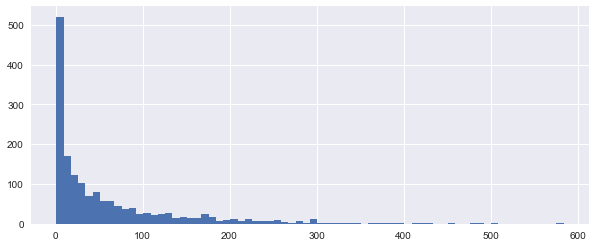

In [60]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

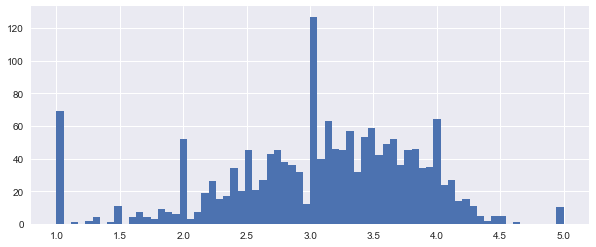

In [61]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

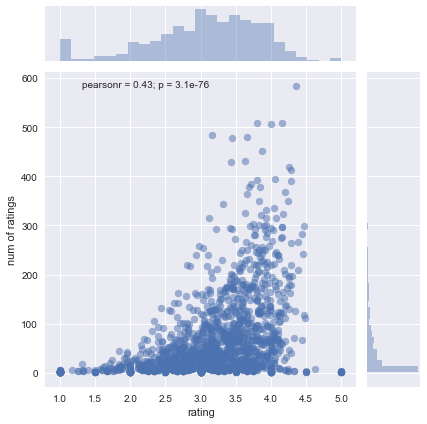

In [62]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [64]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
ratings.sort_values('num of ratings', ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [66]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [68]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/Users/jason/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/jason/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [69]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [70]:
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [72]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [73]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [74]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
